In [584]:
%pylab inline
import numpy as np
import csv
file_root_jack='../CovMatricesJack/'
file_root_all='../CovMatricesAll/'
rr_true_file = '../weight_files/binned_pair_counts_n30_m6_j48.dat'
weights_file = '../weight_files/jackknife_weights_n30_m6_j48.dat'
n=30;m=6;a=1.05

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1.05,'Weight Matrix')

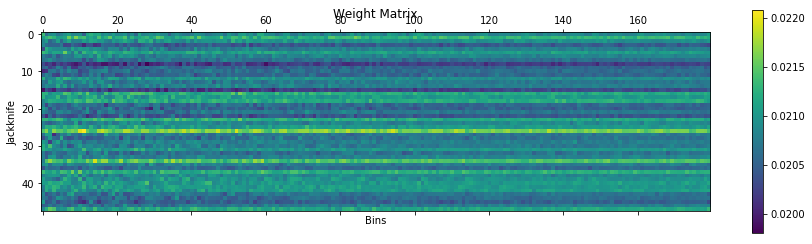

In [585]:
weights=np.loadtxt(weights_file)[:,1:]
plt.matshow(weights)
plt.ylabel('Jackknife')
plt.xlabel('Bins')
plt.colorbar()
plt.title('Weight Matrix')

In [586]:
def read_RR_all(n,m,file_root,a,string='full'):
    rrfile=file_root+'RR_n%d_m%d_%s.txt' %(n,m,string)
    rr_est = np.loadtxt(rrfile)
    rr_true = np.loadtxt(rr_true_file)
    return rr_est, rr_true

In [587]:
def read_cj_all(n,m,file_root,a,string='full'):
    c2file=file_root+'c2j_n%d_m%d_%s.txt' %(n,m,string)
    c3file=file_root+'c3j_n%d_m%d_%s.txt' %(n,m,string)
    c4file=file_root+'c4j_n%d_m%d_%s.txt' %(n,m,string)
    cxfile=file_root+'cxj_n%d_m%d_%s.txt' %(n,m,string)
    errc4file=file_root+'c4errj_n%d_m%d_%s.txt' %(n,m,string)
    errcxfile=file_root+'cxerrj_n%d_m%d_%s.txt' %(n,m,string)
    c2=np.diag(np.loadtxt(c2file))
    c3=np.loadtxt(c3file)
    c4=np.loadtxt(c4file)+np.loadtxt(cxfile)
    cx=np.loadtxt(cxfile)
    errc4=np.loadtxt(errc4file)+np.loadtxt(errcxfile)
    c_tot=c4+a**2.*c2+a*c3
    return c2,c3,c4,cx,errc4,c_tot

def read_c_all(n,m,file_root,a,string='full'):
    c2file=file_root+'c2_n%d_m%d_%s.txt' %(n,m,string)
    c3file=file_root+'c3_n%d_m%d_%s.txt' %(n,m,string)
    c4file=file_root+'c4_n%d_m%d_%s.txt' %(n,m,string)
    errc4file=file_root+'c4err_n%d_m%d_%s.txt' %(n,m,string)
    c2=np.diag(np.loadtxt(c2file))
    c3=np.loadtxt(c3file)
    c4=np.loadtxt(c4file)
    errc4=np.loadtxt(errc4file)
    c_tot=c4+a**2.*c2+a*c3
    return c2,c3,c4,errc4,c_tot

In [588]:
c2j,c3j,c4j,cxj,c4jerr,cj_tot=read_cj_all(n,m,file_root_jack,a)#,string=str(5))
c2,c3,c4,c4err,c_tot=read_c_all(n,m,file_root_all,a)

In [589]:
rr_est,rr_true=read_RR_all(n,m,file_root_all,a)

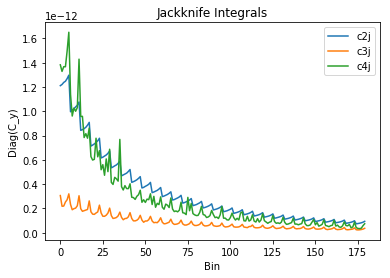

In [590]:
plt.plot(np.diag(c2j),label='c2j')
plt.plot(np.diag(c3j),label='c3j')
plt.plot(np.diag(c4j),label='c4j')
#plt.plot(np.diag(c4jerr),label='errc4')
#plt.ylim([-1e-14,2e-14])
plt.title('Jackknife Integrals')
plt.ylabel('Diag(C_y)');plt.xlabel('Bin')
plt.legend()

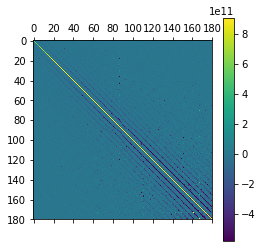

In [591]:
prec=np.linalg.inv(c_tot)
plt.matshow(prec,vmax=np.percentile(prec.ravel(),99.5),vmin=np.percentile(prec.ravel(),0.5))
plt.colorbar()

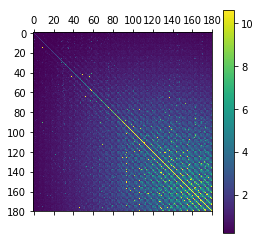

In [607]:
mat=c_tot#c4j-cxj+c2j+c3j#_tot#c4j-cxj#_tot#c3ji#_tot
plt.matshow(mat,vmax=np.percentile(mat.ravel(),99.5),vmin=np.percentile(mat.ravel(),0.5))
#plt.xlim([0,40]);plt.ylim([0,40])
plt.colorbar()

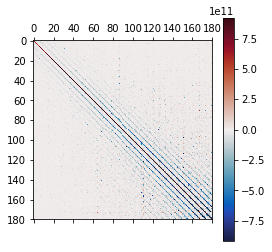

In [593]:
precision=np.linalg.inv(cj_tot)
cmap=cmocean.cm.balance
vmax=np.percentile(precision.ravel(),99.5)
plt.matshow(precision,vmax=vmax,vmin=-vmax,cmap=cmap)
#plt.xlim([120,160]);plt.ylim([120,160])
plt.colorbar(cmap=cmap)

In [623]:
R_par=np.zeros(len(c2));
R_per=np.zeros(len(c2));
for i in range(len(c2)):
    rbin=50+i//m*(150.)/n+2.5
    mubin=i%m/6.+1/12.
    R_par[i]=rbin*mubin
    R_per[i]=rbin*np.sqrt(1.-mubin**2.)
RPAR,RPER=np.meshgrid(R_par,R_per)

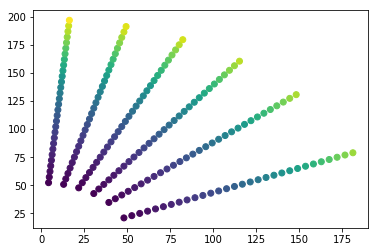

In [644]:
plt.scatter(R_par,R_per,c=np.diag(c2))

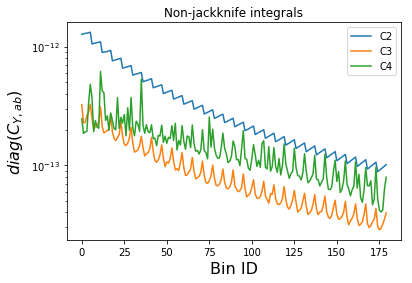

In [594]:
plt.plot(np.diag(c2),label='C2')
plt.plot(np.diag(c3),label='C3')
plt.plot(np.diag(c4),label='C4')
#plt.plot(np.sqrt(np.diag(c4err)-np.diag(c4)**2.),label='std_c4')
plt.yscale('log'); FS=16
plt.xlabel('Bin ID',fontsize=FS)
plt.ylabel(r'$diag(C_{Y,ab})$',fontsize=FS);
plt.title('Non-jackknife integrals')
plt.legend()

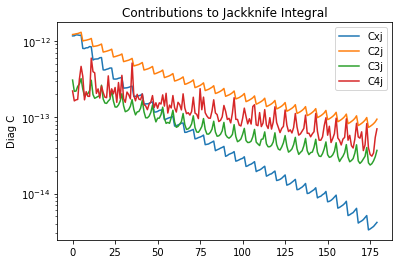

In [595]:
plt.plot(np.diag(cxj),label='Cxj')
plt.plot(np.diag(c2j),label='C2j')
plt.plot(np.diag(c3j),label='C3j')
plt.plot(np.diag(c4j-cxj),label='C4j')
plt.legend();plt.ylabel('Diag C')
plt.title('Contributions to Jackknife Integral');
plt.yscale('log');

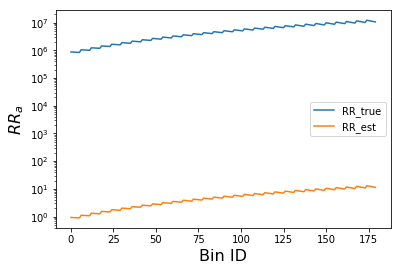

In [596]:
plt.plot(rr_true,label='RR_true')
plt.plot(rr_est,label='RR_est')
plt.yscale('log'); FS=16
plt.xlabel('Bin ID',fontsize=FS)
plt.ylabel(r'$RR_{a}$',fontsize=FS)
plt.legend()

Text(0.5,1,'RR_est/RR_true')

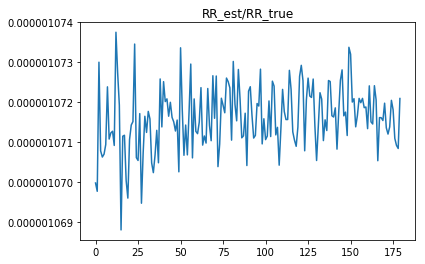

In [597]:
plt.plot((rr_est/rr_true))
plt.title('RR_est/RR_true')

Text(0.5,1,'RR_est/RR_true')

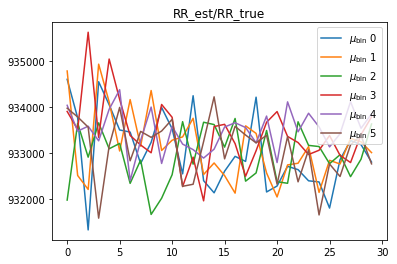

In [598]:
ratio_mu=np.zeros([m,len(rr_true)/m])
for i in range(len(rr_true)):
    ratio_mu[i%m,i/m]=rr_true[i]/rr_est[i]
for i in range(m):
    plt.plot(ratio_mu[i,:],label=r'$\mu_\mathrm{bin}$ %d' %i)
plt.legend()
plt.title('RR_est/RR_true')

In [599]:
tmp_rr=np.zeros(m*n);cnt=0.;rrs=[]
for i in range(50):
    rr_est,rr_true=read_RR_all(n,m,file_root_all,a,string=str(i))
    tmp_rr+=rr_est
    cnt+=1;
    if (cnt-1)%10==0:
        rrs.append(tmp_rr/cnt)
        #tmp_rr=np.zeros(180)
        #cnt=0.

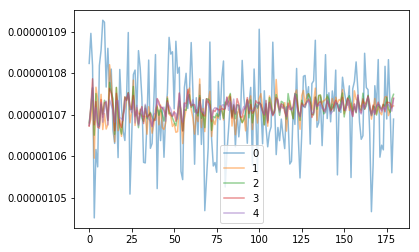

In [600]:
for i in range(len(rrs)):
    plt.plot(rrs[i]/rr_true,alpha=0.5,label=str(i))
plt.legend()

In [601]:
c4s=[];tmp_c4=np.zeros(n*m);cnt=0
for i in range(50):
    c2,c3,c4,c4err,c_tot=read_c_all(n,m,file_root_all,a,str(i))
    tmp_c4+=np.diag(c4);
    cnt+=1;
    if cnt==10:
        c4s.append(tmp_c4/cnt)
        tmp_c4=0.
        cnt=0

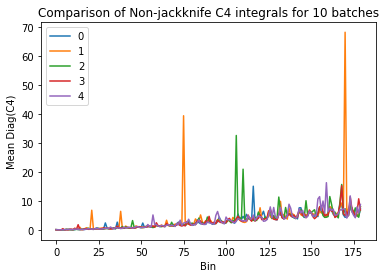

In [602]:
for i in range(5):
    plt.plot(c4s[i],label=i)
plt.title('Comparison of Non-jackknife C4 integrals for 10 batches');
plt.ylabel('Mean Diag(C4)')
plt.xlabel('Bin');plt.legend();